In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import ExtraTreesRegressor, HistGradientBoostingRegressor
from numpyencoder import NumpyEncoder
import lightgbm as lgb
import json
import joblib

In [30]:
df = pd.read_csv('perox_final.csv')
with open('features_perox.txt', 'r') as file:
    features = [feat.replace('\n', '') for feat in file]

Vmax_df = df[features]
Vmax_df['Vmax'] = df['Vmax']
Vmax_target = np.log10(Vmax_df['Vmax'])
Vmax_features = Vmax_df.drop(['Vmax'], axis = 1)
imputer = KNNImputer(n_neighbors=5)
df_filled = imputer.fit_transform(Vmax_features)
Vmax_features = pd.DataFrame(df_filled, columns=Vmax_features.columns)

C:\Users\julia\AppData\Local\Temp\ipykernel_35452\1468874044.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vmax_df['Vmax'] = df['Vmax']


In [31]:
scaler = joblib.load('Vmax_scaler_stack_perox.pkl')
stack = joblib.load('Vmax_model_stacks_perox.pkl')


In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
random_st = 42
size_of_test=0.2

X_train, X_test, y_train, y_test = train_test_split(Vmax_features, Vmax_target, test_size = size_of_test, random_state = random_st)

x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

stack.fit(x_train, y_train).score(x_test, y_test)
y_pred = stack.predict(x_test)
print("R2__score")
print(r2_score(y_test, y_pred))
print("MAE")
print(mean_absolute_error(y_test, y_pred))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1590
[LightGBM] [Info] Number of data points in the train set: 736, number of used features: 37
[LightGBM] [Info] Start training from score -3.794596
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0:	learn: 1.3046324	total: 14.4ms	remaining: 1.42s
1:	learn: 1.2619836	total: 28ms	remaining: 1.37s
2:	learn: 1.2222695	total: 41.8

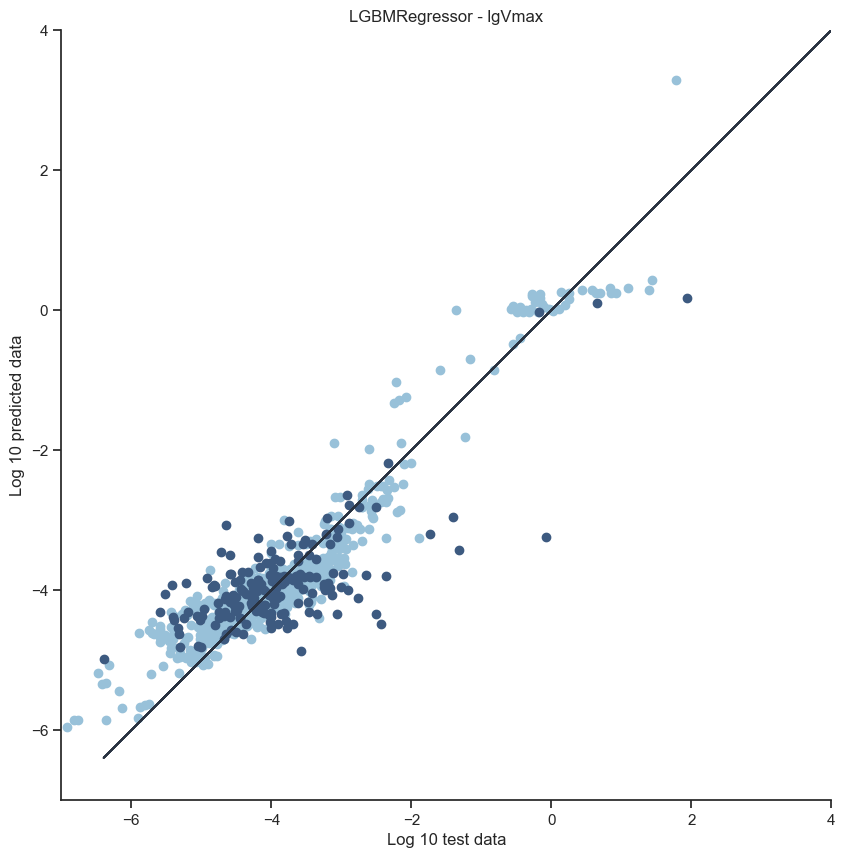

In [29]:
y1_pred = stack.predict(x_train)
import matplotlib.pylab as plt
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
f, ax = plt.subplots(figsize=(13, 10))
plt.scatter(y_train, y1_pred, color='#98c1d9')
plt.scatter(y_test, y_pred, color='#3d5a80')
plt.plot(y_test, y_test, color='#293241')
plt.title('LGBMRegressor - lgVmax')
plt.xlabel('Log 10 test data')
plt.ylabel('Log 10 predicted data')
plt.xlim(-7, 4)
plt.ylim(-7, 4)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('Vmax_stack_milti.png', transparent=True, dpi=1200)
plt.show()